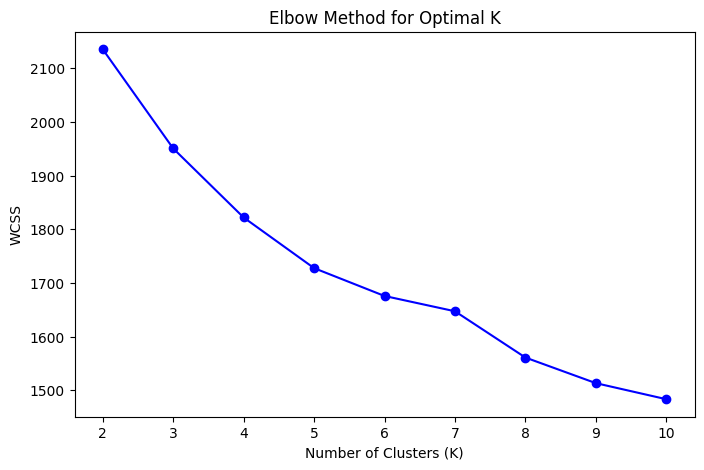

Optimal K: 3
K-Means clusters: [100  93 104]


In [31]:
# 1. Apply K-Means Clustering (elbow method to determine K)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage

df = pd.read_csv('../data/heart_disease_preprocessed.csv')
X = df.drop('num', axis=1)
y = df['num']

# Elbow method to find optimal K
wcss = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

# Apply K-Means with optimal K
optimal_k = 3
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans_final.fit_predict(X)
print(f"Optimal K: {optimal_k}")
print(f"K-Means clusters: {np.bincount(kmeans_labels)}")

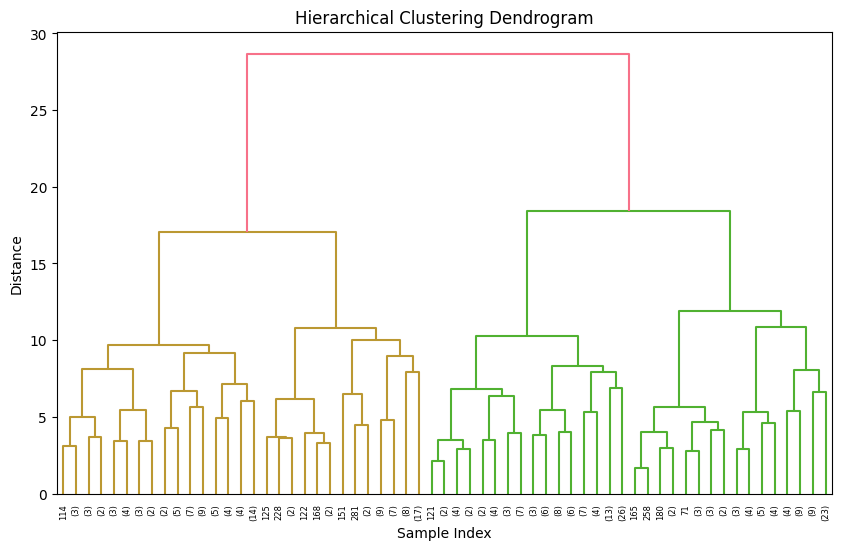

Hierarchical clusters: [124  75  98]


In [32]:
# 2. Perform Hierarchical Clustering (dendrogram analysis)
Z = linkage(X, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Apply hierarchical clustering
hierarch_labels = AgglomerativeClustering(n_clusters=optimal_k).fit_predict(X)
print(f"Hierarchical clusters: {np.bincount(hierarch_labels)}")

In [33]:
# 3. Compare clusters with actual disease labels
# Convert to binary classification (No Disease vs Disease)
y_binary = (y > 0).astype(int)

# Calculate performance metrics
silhouette_kmeans = silhouette_score(X, kmeans_labels)
silhouette_hierarch = silhouette_score(X, hierarch_labels)
ari_kmeans = adjusted_rand_score(y_binary, kmeans_labels)
ari_hierarch = adjusted_rand_score(y_binary, hierarch_labels)

print("Clustering Results Summary:")
print(f"K-Means: Silhouette={silhouette_kmeans:.3f}, ARI={ari_kmeans:.3f}")
print(f"Hierarchical: Silhouette={silhouette_hierarch:.3f}, ARI={ari_hierarch:.3f}")
print(f"\nBest method: {'K-Means' if ari_kmeans > ari_hierarch else 'Hierarchical'}")

Clustering Results Summary:
K-Means: Silhouette=0.123, ARI=0.249
Hierarchical: Silhouette=0.098, ARI=0.186

Best method: K-Means
